<table style="float:left; border:none">
   <tr style="border:none">
       <td style="border:none">
           <a href="http://bokeh.pydata.org/">     
           <img 
               src="http://bokeh.pydata.org/en/latest/_static/bokeh-transparent.png" 
               style="width:70px"
           >
           </a>    
       </td>
       <td style="border:none">
           <h1>Bokeh Tutorial &mdash; <tt style="display:inline">bokeh.charts</tt> interface</h1>
       </td>
   </tr>
</table>

In [1]:
import numpy as np
import pandas as pd
from bokeh.io import output_notebook, show


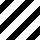
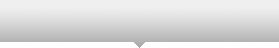
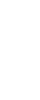
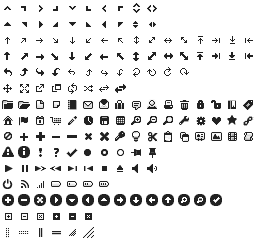
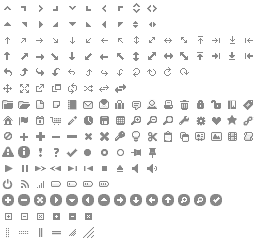
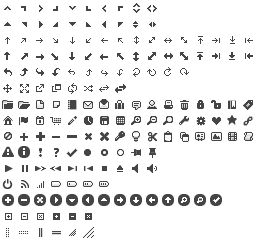
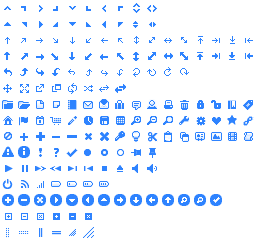
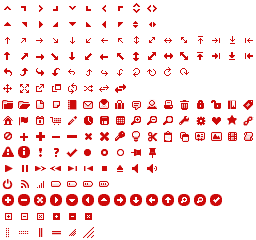
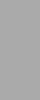
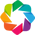
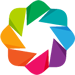
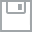
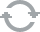
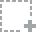
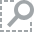
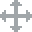
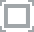
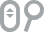

In [2]:
output_notebook()

In [8]:
from bokeh.charts import Scatter
from bokeh.sampledata.iris import flowers

# fill a data frame with the data of interest and create a groupby object
df = flowers[["petal_length", "petal_width", "species"]]
xyvalues = df.groupby("species")

# any of the following commented are also valid Scatter inputs
#xyvalues = pd.DataFrame(xyvalues)
#xyvalues = xyvalues.values()
#xyvalues = np.array(xyvalues.values())

TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,previewsave"

scatter = Scatter(xyvalues, tools=TOOLS, ylabel='petal_width')

show(scatter)

In [7]:
from bokeh.charts import Bar
from bokeh.sampledata.olympics2014 import data

df = pd.io.json.json_normalize(data['data'])

# filter by countries with at least one medal and sort
df = df[df['medals.total'] > 0]
df = df.sort("medals.total", ascending=False)

# get the countries and we group the data by medal type
countries = df.abbr.values.tolist()
gold = df['medals.gold'].astype(float).values
silver = df['medals.silver'].astype(float).values
bronze = df['medals.bronze'].astype(float).values

# build a dict containing the grouped data
medals = pd.DataFrame(dict(bronze=bronze, silver=silver, gold=gold))

bar = Bar(medals, countries, title="Stacked bars", stacked=True)

show(bar)

In [10]:
from bokeh.charts import Histogram

# build some distributions and load them into a dict
mu, sigma = 0, 0.5
normal = np.random.normal(mu, sigma, 1000)
lognormal = np.random.lognormal(mu, sigma, 1000)

# create a pandas data frame from the dict
df = pd.DataFrame(dict(normal=normal, lognormal=lognormal))

hist = Histogram(df, bins=50, legend=True)

show(hist)